# Kleiber's law
## Estimating the daily flesh need of a dragon

## Learning Goals:
+  Understand the log scale and the power function
+  Basic data visualization
+  Regression (scikit-learn, statsmodels)
+  Log-log regression

## A short introduction of Kleiber's law:     
+  The law is named after Max Kleiber for his biology work in the early 1930s.
+  The law is the observation that, for the vast majority of animals, an animal's metabolic rate scales to the 3⁄4 power of the animal's mass. 
+  Check out the wiki link: https://en.wikipedia.org/wiki/Kleiber%27s_law


<img src="Kleiber_law.jpg" width=800>

In [1]:
import numpy as np
import pandas as pd #data science package 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #graphic package


import warnings
warnings.filterwarnings("ignore")

import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [2]:
#read data from The Statistical Sleuth: A Course in Methods of Data Analysis

df=pd.read_excel("animals.xlsx") 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CommonName      97 non-null     object 
 1   Species         97 non-null     object 
 2   Mass (kg)       97 non-null     float64
 3   Metab (kJ/day)  97 non-null     float64
 4   Life            97 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.9+ KB


In [3]:
df.head()

,CommonName,Species,Mass (kg),Metab (kJ/day),Life
0,Shrew,Sorex caecutiens,0.00360,15.00,0.8
1,Marsupial,Antechinomus stuartii,0.00365,17.60,2.5
2,Common shrew,Sorex araneus,0.00500,17.60,0.8
3,Marsupial,Antechinomus laniger,0.00850,5.17,2.0
4,Mouse,Microtus minutus,0.00980,18.00,0.8


In [4]:
df.tail(10) 

#mass polarized from 0.003 to 1000+

,CommonName,Species,Mass (kg),Metab (kJ/day),Life
87,Swine,Sus scrofa,140.0,12000.0,15.0
88,Orangutan,Pongo pygma eus,150.0,15500.0,45.0
89,Beluga whale,Delphinapterus leucas,170.0,23000.0,25.0
90,Gorilla,Gorilla gorilla,250.0,21000.0,45.0
91,Horse,Equus cabalus,400.0,32000.0,40.0
92,Camel,Camelus dromedarius,407.0,23600.0,26.0
93,Buffalo,Bubalus caffer,420.0,29400.0,35.0
94,Bottle-nosed whale,Hyperoodon ampullatus,1000.0,69500.0,40.0
95,Asian elephant,Elephas maximum,3000.0,165000.0,54.0
96,Blue whale,Balaenoptera musculus,150000.0,8360000.0,90.0


Text(0.5, 1.0, 'Log Scale')

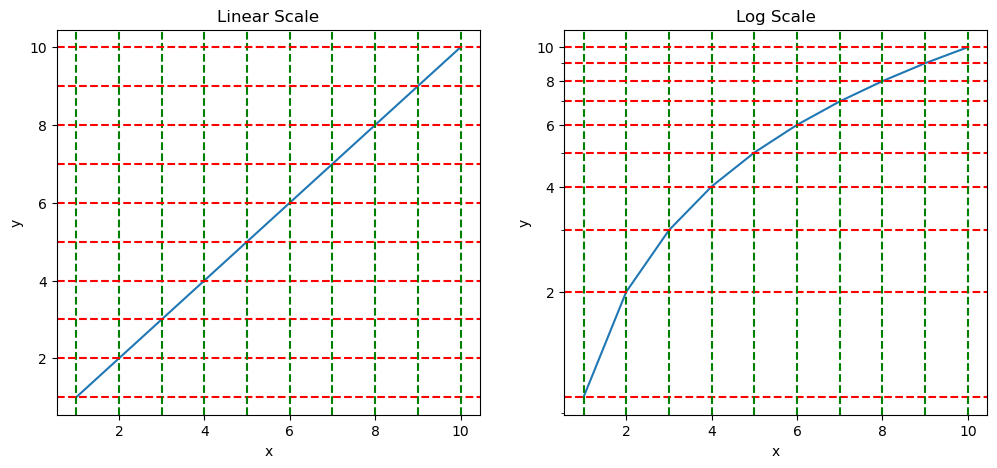

In [5]:
# How to read log-scale

data=pd.DataFrame({'x':np.arange(1,11),'y':np.arange(1,11)})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot on the first subplot
sns.lineplot(x='x', y='y', data=data, ax=axes[0])

for i in np.arange(1,11):
    axes[0].axvline(x=i, color='green', linestyle='--')
    axes[0].axhline(y=i, color='red', linestyle='--')

axes[0].set_title("Linear Scale")

# Plot on the second subplot
sns.lineplot(x='x', y='y', data=data, ax=axes[1])

for i in np.arange(1,11):
    axes[1].axvline(x=i, color='green', linestyle='--')
    axes[1].axhline(y=i, color='red', linestyle='--')

axes[1].set_yscale('log') #change y-axis to log scale
axes[1].set_yticks(np.arange(2,12,2))
axes[1].set_yticklabels(np.arange(2,12,2))
axes[1].set_title("Log Scale")

In [6]:
#visualize weight vs. energy need
#log-scale is needed for polarized data values

fig = px.scatter(df, x='Mass (kg)', y='Metab (kJ/day)', text='CommonName', title='Weight vs. Energy Need', log_y=True, log_x=True)
#remove the log_y and log_x options and see what happens

fig.update_layout(
    xaxis_title="Weight",
    yaxis_title="Energy Need",
    title_font_size=24
)

fig.update_traces(textfont_size=8)

fig.update_layout(width=1000, height=600)
fig.show()

In [7]:
#log-transformation (e.g. log(1000)=3 and log(0.01)=-2)

df['log-weight']=np.log10(df['Mass (kg)'])
df['log-energy need']=np.log10(df['Metab (kJ/day)'])


In [8]:
#visualize weight vs. energy need

fig = px.scatter(df, x='log-weight', y='log-energy need', text='CommonName', title='Weight vs. Energy Need')

fig.update_layout(
    xaxis_title="log(Weight)",
    yaxis_title="log(Energy Need)",
    title_font_size=24
)

fig.update_traces(textfont_size=8)

fig.update_layout(width=1000, height=600)
fig.show()

#compare this chart with the previous one

In [9]:
#Kleiber's law: log-log regression

#method 1 - scikit-learn
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn.linear_model import LinearRegression

X = df['log-weight'].values.reshape(-1, 1)
y = df['log-energy need']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f'Intercept: {intercept:.4f}')
print(f'Slope: {slope:.4f}') 

#By the Kleiber's law, the slope should be 0.75

Intercept: 2.4534
Slope: 0.7549


#### Question: We know that kilojoule (kJ) is equal to approximately 0.239 kilocalories (kcal). If we change the energy unit to calories, how does the regression result change?

In [10]:
#method 2 - statsmodels
#https://www.statsmodels.org/stable/regression.html

import statsmodels.api as sm

# Fit and summarize OLS model
lr = sm.OLS(df['log-energy need'], sm.add_constant(df['log-weight'])).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:        log-energy need   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2855.
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           1.12e-72
Time:                        12:35:52   Log-Likelihood:                 16.509
No. Observations:                  97   AIC:                            -29.02
Df Residuals:                      95   BIC:                            -23.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4534      0.021    116.168      0.0

In [11]:
# Fitted y-values

predictions = lr.get_prediction(sm.add_constant(df['log-weight'])) #method 2
prediction_summary_frame = predictions.summary_frame(alpha=0.05) #95% CI

In [12]:
df['log-energy need fitted'] = model.predict(X) #method 1
df['log-energy need fitted_lower']= prediction_summary_frame['obs_ci_lower']
df['log-energy need fitted_upper']= prediction_summary_frame['obs_ci_upper']
df.tail()

,CommonName,Species,Mass (kg),Metab (kJ/day),Life,log-weight,log-energy need,log-energy need fitted,log-energy need fitted_lower,log-energy need fitted_upper
92,Camel,Camelus dromedarius,407.0,23600.0,26.0,2.609594,4.372912,4.423454,4.006371,4.840537
93,Buffalo,Bubalus caffer,420.0,29400.0,35.0,2.623249,4.468347,4.433762,4.016617,4.850907
94,Bottle-nosed whale,Hyperoodon ampullatus,1000.0,69500.0,40.0,3.000000,4.841985,4.718175,4.299174,5.137177
95,Asian elephant,Elephas maximum,3000.0,165000.0,54.0,3.477121,5.217484,5.078360,4.656640,5.500080
96,Blue whale,Balaenoptera musculus,150000.0,8360000.0,90.0,5.176091,6.922206,6.360932,5.926311,6.795554


In [13]:
#visualize weight vs. energy need

fig = px.scatter(df, x='log-weight', y='log-energy need', text='CommonName', title='Weight vs. Energy Need')

#fitted linear line
fig.add_scatter(x=df['log-weight'], y=df['log-energy need fitted'], mode='lines', name='Fitted Line')
fig.add_scatter(x=df['log-weight'], y=df['log-energy need fitted_lower'], mode='lines', name='Fitted Line Lower',  line=dict(color='orange'))
fig.add_scatter(x=df['log-weight'], y=df['log-energy need fitted_upper'], mode='lines', name='Fitted Line Upper',  line=dict(color='orange'))

fig.update_layout(
    xaxis_title="log(Weight)",
    yaxis_title="log(Energy Need)",
    title_font_size=24
)

fig.update_traces(textfont_size=8)

fig.update_layout(width=1000, height=600)
fig.show()

#blue whale - underfitting!

In [14]:
#visualize weight vs. energy need

df['energy need fitted']=np.power(10, df['log-energy need fitted'])
df['energy need fitted_lower']=np.power(10, df['log-energy need fitted_lower'])
df['energy need fitted_upper']=np.power(10, df['log-energy need fitted_upper'])

fig = px.scatter(df, x='Mass (kg)', y='Metab (kJ/day)', text='CommonName', title='Weight vs. Energy Need', log_y=True, log_x=True)
#remove the log_y and log_x options and see what happens

fig.add_scatter(x=df['Mass (kg)'], y=df['energy need fitted'], mode='lines', name='Fitted Line')
fig.add_scatter(x=df['Mass (kg)'], y=df['energy need fitted_lower'], mode='lines', name='Fitted Line Lower', line=dict(color='orange'))
fig.add_scatter(x=df['Mass (kg)'], y=df['energy need fitted_upper'], mode='lines', name='Fitted Line Upper', line=dict(color='orange'))


fig.update_layout(
    xaxis_title="Weight",
    yaxis_title="Energy Need",
    title_font_size=24
),

fig.update_traces(textfont_size=8)

fig.update_layout(width=1000, height=600)
fig.show()

#compare this chart with the previous one

In [15]:
#Errors - fitted value 

df['percentage error']=(df['Metab (kJ/day)']-df['energy need fitted'])/df['energy need fitted']

In [17]:
fig = px.scatter(df, x='Mass (kg)', y='percentage error', text='CommonName', title='Percentage errors', log_x=True)

fig.update_layout(
    xaxis_title="Weight",
    yaxis_title="Percentage Error",
    title_font_size=24
)

fig.update_traces(textfont_size=8)

fig.update_layout(width=1000, height=600)
fig.show()

#Why cannot we use Metab (kJ/day) minus energy need fitted as an error measure??
#blue whale - underfitting

### Dragons can easily weigh hundreds of tons, comparable to some of the heaviest airplanes. For instance, the Boeing 787 Dreamliner weighs around 250 tons (the size similar to Drogon).

<img src="dragons.jpg" width=800>

In [18]:
#estimate energy need for dragons from 100 to 2000 tons

df_dragon=pd.DataFrame({'Dragon Weight': range(100000, 2100000,100000)})
df_dragon['Dragon log-energy need'] = model.predict(np.log10(df_dragon['Dragon Weight']).values.reshape(-1, 1))
df_dragon['Dragon energy need']=np.power(10, df_dragon['Dragon log-energy need'])

df_dragon['Dragon log-energy need_upper']= lr.get_prediction(sm.add_constant(np.log10(df_dragon['Dragon Weight']))).summary_frame(alpha=0.05)['obs_ci_upper']
df_dragon['Dragon energy need_upper']=np.power(10, df_dragon['Dragon log-energy need_upper'])

df_dragon['Dragon log-energy need_lower']= lr.get_prediction(sm.add_constant(np.log10(df_dragon['Dragon Weight']))).summary_frame(alpha=0.05)['obs_ci_lower']
df_dragon['Dragon energy need_lower']=np.power(10, df_dragon['Dragon log-energy need_lower'])


In [19]:
# meat per kg can generate 2000 calories

df_dragon['meat (kg) daily']=df_dragon['Dragon energy need']*0.239/2000
df_dragon['meat (kg) daily_upper']=df_dragon['Dragon energy need_upper']*0.239/2000
df_dragon['meat (kg) daily_lower']=df_dragon['Dragon energy need_lower']*0.239/2000

In [20]:
# sheep weight (100 kgs); horse (500 kgs); cattle (1000 kgs)

df_dragon['sheep daily']=df_dragon['meat (kg) daily']/100
df_dragon['sheep daily_upper']=df_dragon['meat (kg) daily_upper']/100
df_dragon['sheep daily_lower']=df_dragon['meat (kg) daily_lower']/100

df_dragon.head(10)

,Dragon Weight,Dragon log-energy need,Dragon energy need,Dragon log-energy need_upper,Dragon energy need_upper,Dragon log-energy need_lower,Dragon energy need_lower,meat (kg) daily,meat (kg) daily_upper,meat (kg) daily_lower,sheep daily,sheep daily_upper,sheep daily_lower
0,100000,6.227999,1.690437e+06,6.661058,4.582028e+06,5.794940,6.236494e+05,202.007276,547.552323,74.526101,2.020073,5.475523,0.745261
1,200000,6.455250,2.852661e+06,6.891011,7.780566e+06,6.019489,1.045898e+06,340.893026,929.777622,124.984784,3.408930,9.297776,1.249848
2,300000,6.588184,3.874214e+06,7.025593,1.060701e+07,6.150774,1.415057e+06,462.968550,1267.538254,169.099337,4.629686,12.675383,1.690993
3,400000,6.682501,4.813947e+06,7.121111,1.321632e+07,6.243892,1.753445e+06,575.266680,1579.350390,209.536626,5.752667,15.793504,2.095366
4,500000,6.755660,5.697179e+06,7.195217,1.567533e+07,6.316103,2.070632e+06,680.812834,1873.201705,247.440580,6.808128,18.732017,2.474406
5,600000,6.815435,6.537846e+06,7.255777,1.802091e+07,6.375093,2.371880e+06,781.272600,2153.498342,283.439677,7.812726,21.534983,2.834397
6,700000,6.865974,7.344692e+06,7.306987,2.027622e+07,6.424960,2.660481e+06,877.690740,2423.008439,317.927508,8.776907,24.230084,3.179275
7,800000,6.909752,8.123673e+06,7.351353,2.245707e+07,6.468152,2.938676e+06,970.778888,2683.619936,351.171802,9.707789,26.836199,3.511718
8,900000,6.948368,8.879082e+06,7.390491,2.457486e+07,6.506245,3.208079e+06,1061.050286,2936.695978,383.365428,10.610503,29.366960,3.833654
9,1000000,6.982911,9.614151e+06,7.425505,2.663818e+07,6.540317,3.469902e+06,1148.891027,3183.263012,414.653325,11.488910,31.832630,4.146533


In [21]:
df_dragon.tail(10)

,Dragon Weight,Dragon log-energy need,Dragon energy need,Dragon log-energy need_upper,Dragon energy need_upper,Dragon log-energy need_lower,Dragon energy need_lower,meat (kg) daily,meat (kg) daily_upper,meat (kg) daily_lower,sheep daily,sheep daily_upper,sheep daily_lower
10,1100000,7.014159,1.033139e+07,7.457181,2.865372e+07,6.571137,3.725088e+06,1234.601115,3424.119322,445.148013,12.346011,34.241193,4.451480
11,1200000,7.042686,1.103280e+07,7.486102,3.062679e+07,6.599270,3.974386e+06,1318.419738,3659.901871,474.939129,13.184197,36.599019,4.749391
12,1300000,7.068928,1.172001e+07,7.512708,3.256175e+07,6.625148,4.218407e+06,1400.541627,3891.129608,504.099592,14.005416,38.911296,5.040996
13,1400000,7.093225,1.239438e+07,7.537343,3.446220e+07,6.649106,4.457655e+06,1481.128093,4118.232718,532.689767,14.811281,41.182327,5.326898
14,1500000,7.115844,1.305703e+07,7.560279,3.633116e+07,6.671409,4.692555e+06,1560.314739,4341.573045,560.760365,15.603147,43.415730,5.607604
15,1600000,7.137004,1.370893e+07,7.581736,3.817120e+07,6.692271,4.923469e+06,1638.216991,4561.458775,588.354524,16.382170,45.614588,5.883545
16,1700000,7.156880,1.435091e+07,7.601892,3.998456e+07,6.711867,5.150706e+06,1714.934167,4778.155237,615.509345,17.149342,47.781552,6.155093
17,1800000,7.175619,1.498370e+07,7.620897,4.177316e+07,6.730341,5.374536e+06,1790.552544,4991.893029,642.257034,17.905525,49.918930,6.422570
18,1900000,7.193345,1.560793e+07,7.638875,4.353870e+07,6.747815,5.595195e+06,1865.147690,5202.874236,668.625792,18.651477,52.028742,6.686258
19,2000000,7.210162,1.622415e+07,7.655932,4.528265e+07,6.764392,5.812891e+06,1938.786293,5411.277268,694.640489,19.387863,54.112773,6.946405


In [25]:
fig = px.line(df_dragon, x='Dragon Weight', y='sheep daily', title='Weight vs. Number of Sheep')
#no log-scale needed

fig.add_scatter(x=df_dragon['Dragon Weight'], y=df_dragon['sheep daily_upper'], mode='lines', name='Fitted Line Upper', line=dict(color='orange'))
fig.add_scatter(x=df_dragon['Dragon Weight'], y=df_dragon['sheep daily_lower'], mode='lines', name='Fitted Line Lower', line=dict(color='orange'))


fig.update_layout(
    xaxis_title="Weight(kg)",
    yaxis_title="Number of Sheep",
    title_font_size=24
),

fig.update_traces(textfont_size=8)

fig.update_layout(width=1000, height=600)
fig.show()

## Conclusions:
+ In the dataset, only blue whales match the weight scale of dragons
+ Kleiber's law under-estimates the energy need of blue whales, a leveraged data point with the fitting error of 250% (see the percentage error chart)
+ Dragons need 10-50 sheep daily (the upper-bound is a safer bet), such as, Drogon (10 sheeps) and Vhagar(50) 